In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
TRI = train_images.reshape(60000, 784)
TSI = test_images.reshape(10000, 784)
TRI = TRI.astype('float32')
TSI = TSI.astype('float32')

TRI /= 255
TSI /= 255

In [4]:
TRL = keras.utils.to_categorical(train_labels, 10)
TSL = keras.utils.to_categorical(test_labels, 10)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


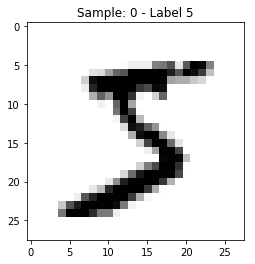

In [51]:
import matplotlib.pyplot as plt

%matplotlib inline

def display_sample(index):
    
    print(TRL[index])
    
    label = TRL[index].argmax(axis=0)
    
    image = TRI[index].reshape([28, 28])
    
    plt.title('Sample: %d - Label %d' % (index, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(0)

In [13]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [43]:
import numpy as np
from keras.utils import np_utils

images = np.array(TRI[45800])
images = images.reshape(1, 784)

feature_data = np.array(images);
label_data = np.array([9])

label_data = np_utils.to_categorical(label_data, 10)

print(label_data)

b = model.train_on_batch(feature_data, label_data)
print(b)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[0.0021404866, 1.0]


In [44]:
images = np.array(TRI[3800])
images = images.reshape(1, 784)

feature_data = np.array(images);
label_data = np.array([1])

label_data = np_utils.to_categorical(label_data, 10)

print(label_data)

b = model.train_on_batch(feature_data, label_data)
print(b)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3.517336, 0.0]


In [45]:
images = np.array(TRI[40000])
images = images.reshape(1, 784)

feature_data = np.array(images);
label_data = np.array([7])

label_data = np_utils.to_categorical(label_data, 10)

print(label_data)

b = model.train_on_batch(feature_data, label_data)
print(b)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[3.5659873, 0.0]


In [52]:
p = model.predict_classes([TRI[0].reshape(1,784)])
print(p)

[9]


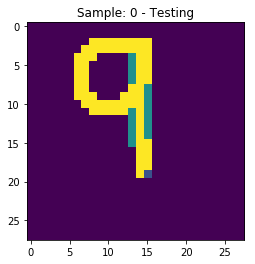

[9]


In [55]:
import cv2
def prepareImage(filename):
    img_arr = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    img_arr = cv2.resize(img_arr, (28, 28))
    
    plt.title('Sample: 0 - Testing')
    plt.imshow(img_arr)
    plt.show()
    
    return img_arr.reshape(1, 784)

p = model.predict_classes([prepareImage('uploaded.png')])
print(p)

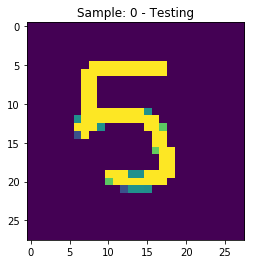

[9]


In [58]:
import cv2
def prepareImage(filename):
    img_arr = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    img_arr = cv2.resize(img_arr, (28, 28))
    
    plt.title('Sample: 0 - Testing')
    plt.imshow(img_arr)
    plt.show()
    
    return img_arr.reshape(1, 784)

p = model.predict_classes([prepareImage('cero.png')])
print(p)

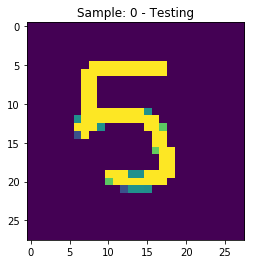

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[16.118095, 0.0]


In [57]:
images = np.array(prepareImage('cero.png'))
images = images.reshape(1, 784)

feature_data = np.array(images);
label_data = np.array([5])

label_data = np_utils.to_categorical(label_data, 10)

print(label_data)

b = model.train_on_batch(feature_data, label_data)
print(b)

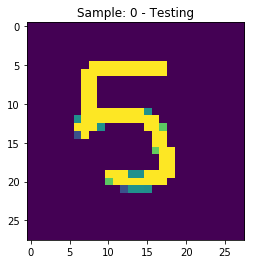

[9]


In [59]:
import cv2
def prepareImage(filename):
    img_arr = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    img_arr = cv2.resize(img_arr, (28, 28))
    
    plt.title('Sample: 0 - Testing')
    plt.imshow(img_arr)
    plt.show()
    
    return img_arr.reshape(1, 784)

p = model.predict_classes([prepareImage('cero.png')])
print(p)

In [66]:
!pip install sklearn

     |████████████████████████████████| 6.6MB 2.1MB/s eta 0:00:01     |████████████▌                   | 2.6MB 2.1MB/s eta 0:00:02     |███████████████████▎            | 4.0MB 2.1MB/s eta 0:00:02
     |████████████████████████████████| 286kB 18.3MB/s eta 0:00:01
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [87]:
print(TRI[40000])

print("------------------------------------------------")

def prepareImage(filename):
    img_arr = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    img_arr = cv2.resize(img_arr, (28, 28))
    img_arr.astype('float32')
    
    img_arr = img_arr.reshape(1, 784)
    
    img_arr = img_arr.astype('float32')
    img_arr /= 255
    
    return img_arr

X = prepareImage('cero.png')

print(X)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [88]:
images = np.array(prepareImage('cero.png'))
images = images.reshape(1, 784)

feature_data = np.array(images);
label_data = np.array([5])

label_data = np_utils.to_categorical(label_data, 10)
print(images)
print(label_data)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

In [89]:

b = model.train_on_batch(feature_data, label_data)
print(b)

[2.5491712, 0.0]


In [90]:
p = model.predict_classes([prepareImage('cero.png')])
print(p)

[5]
